<a href="https://colab.research.google.com/github/ektamistry/ekta/blob/main/Luck_Analysis_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**RPET Project**

####**Aim of the Project:** Analysis of gameplay in a multiplayer Teen Patti game.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

**Cards Sets**

*Initialising Universal Sets or deck of Cards*


*11 = Jack*

*12 = Queen*

*13 = King*

*14 = Ace*

In [ ]:
shapes={"Hearts":'H',"Spades":'S',"Clubs":'C',"Diamonds":'D'}                   # Set/Dictionary of Shapes
numbers= np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12 ,13, 14])                 # Array Of Numbers

*Picking 3 random cards per set of random Shape and Colour using the random function*

In [ ]:
def CardInitialise():
  Cards=[]
  for i in range(3):                                                            # Initialising Cards
    Shape=random.choice(list(shapes.values()))
    Numbers=random.choice(numbers)
    Cards.append(Shape)
    Cards.append(Numbers)
  return Cards


*Yes = 1.*

*No = 0.*

*Checking if the picked 3 Cards are of the same colour or not*

In [ ]:
def ColorCheck(Cards):      
  Color = 0                                                                     # Color of cards adding to the weight
  j = Cards[0]                                                                  # Counter for Colors
  for i in range(0,5,2):                                                        # Checking for Colors Matching
    if j == Cards[i]:
      Color+=1                                                                  # Counter Value
  if Color == 3:
    return 1                                                                 
  return 0

*Checking if the cards have two cards of the same number irrespective of having a trio*

In [ ]:
def Double(Cards):      
  if Cards[1] == Cards[3] or Cards[1] == Cards[5] or Cards[5]==Cards[3]:        # Checking for Double cards
    return 1  
  else:                                                               
    return 0

*Checking for a trio in the set, 3 cards of the same Number*

In [ ]:
def Trio(Cards):      
  Trio = 0                                                                      # Trio adding to the weight
  j = Cards[1]                                                                  # Counter for Triple
  for i in range(1,6,2):                                                        # Checking for Matching Cards
    if j == Cards[i]:
      Trio+=1                                                                   # Counter Value
  if Trio == 3:
    return 1                                                                 
  return 0

*We check for Sequence of Cards in Any order with one exception sequence of Ace, King, Queen*

In [ ]:
def Sequence(Cards): 

  Sequence = 0 
  if Cards[1]==14:                                                              # Exception Case Ace, Two Three/ Cards aren't sorted so we check all possible cases
    if (Cards[3]==2):
      if (Cards[5]==3):
        Sequence = 2
    elif Cards[3] == 3:
      if Cards[5] == 2:
        Sequence = 2
  if Cards[1]==2:
    if Cards[3]==3:
      if Cards[5] == 14:
        Sequence = 2
    elif Cards[3] == 1:
      if Cards[5] == 3:
        Sequence = 2
  if Cards[1]==3:
    if Cards[3]==14:
      if Cards[5] == 2:
        Sequence = 2
    elif Cards[3] == 2:
      if Cards[5] == 14:
        Sequence = 2
  else:
    values=[]
    for i in range(1,6,2):  
      values.append(Cards[i])
    values.sort()                                                               # We pick the card values and sort them to check if they are in a particular sequence
    if values[0] + 1 == values[1] and values[2] - 1 == values[1]:
      Sequence = 2                                                              
  if Sequence == 2:
    return 1
  else:                                                                 
    return 0


*If it's a color set and Sequence its a pure Sequence*

In [ ]:
def PureSequence(Cards):
  x = ColorCheck(Cards)                                                         # Calling Color Check Function and taking its returned value
  y = Sequence(Cards)                                                           # Calling Sequence Function and taking its returned value
  x = x+y                                                                       # Checking if both the functions return a true value
  if x == 2:
    return 1
  else:
    return 0

*Checking for the Highest Card of the Set*

In [ ]:
def HighCard(Cards):
  Number=[]
  for i in range(1,6,2):
    Number.append(Cards[i])                                                     
  Max_Val=max(Number)                                                           # Extracting and returning the Maximum value of the Card set
  return (Max_Val)
  



*Checking for the Second Highest Card of the Set*

In [ ]:
def SecondHighCard(Cards):
  Number=[]
  for i in range(1,6,2):
    Number.append(Cards[i])                                                     
  Number.sort()                                                                 # Extracting and returning the Maximum value of the Card set
  return (Number[1])

*Giving the game a score from 2 to 84, where 1 being the worst an 83 being the best*

In [ ]:
def Game():
  cards=CardInitialise()
  game=0
  if Trio(cards)==1:                                                            # Trio gets  the top priority of 145 + the Highest Card/s Value
    game=145
  elif PureSequence(cards)==1:
    game=116
  elif Sequence(cards)==1:
    game=87
  elif ColorCheck(cards)==1:
    game=58
  elif Double(cards)==1:                                                        # Double gets the lowest priority after High card having value 29 + Highest Card/s Value
    game=29
    
  x = HighCard(cards)
  y = SecondHighCard(cards)
  game = game + x + y
  return game

*Input function of the code where number of players is initalised and the value of their game and their names are stored in a respective array*

In [ ]:
def IO(no_of_players):
  Num = no_of_players                                                           # Number of Players are user defined in the Gamble Function function
  grade=[]                                                                      # Stores the Game Value of each set
  for i in range(Num):                                                                                                                
    Player_Score = Game()
    grade.append(Player_Score)
  Winner = max(grade)                                                           # The max value is stored in winner
  for i in range(0,Num):
    if Winner == grade[i]:                                                      # Position of the Winner Value that corresponds to the Name 
      position = i
  return position


In [ ]:
no_of_games=np.arange(start=1, stop=101)                                        # Numpy array to create a scale for X axis

*The most Important Gamble Function that does most of the processing*

In [ ]:
def Gamble():
  no_of_players = int(input("Enter numbers of players: "))                      # Number of Players in the Game
  Money = []                                                                    # Array for start of Money
  names = []
  GamePlay = []
  player_game = []
  Luck=[0]*no_of_players
  for i in range(0,no_of_players):
    y=input("Enter name of Player: ")                                           # Entering names of Players
    names.append(y)
    start = int(input("Enter Money:"))                                          # Entering Money they start the game with
    Money.append(start)
  print("\n \nPlayers Playing are: ")
  for i in range(0,no_of_players):
    print(i+1,".", names[i]," with Rs.", Money[i])
  player_no = int(input("Enter the number of Player, who's statistical Analysis is required: "))
  print("Here is your analysis for Mr. / Ms.",names[player_no-1])
  for j in range(0,100):
    Winnerrank = IO(no_of_players)                                              # Processing the Position of the Winner
    for k in range(0,no_of_players):
      Money[k] = Money[k] - 10                                                  # Pot Money for the Game
    Money[Winnerrank] = Money[Winnerrank] + no_of_players*10                    # Rewarding the Money
    Luck[Winnerrank]=Luck[Winnerrank]+1                                         # Luck Factor
    for a in range(0,no_of_players):
      GamePlay.append(Money[a])                                                 
  for i in range(player_no-1, 100*no_of_players, no_of_players):
    x = GamePlay[i]
    player_game.append(x)
  plt.plot(no_of_games,player_game)                                             # Plotting Graph
  plt.xlabel("Game Number ---->")
  plt.xticks(range(0,100,10))
  plt.ylabel("Money Values---->")
  plt.title("Player {0} Gameplay".format(names[player_no-1]))                   # Title Of the Graph
  return Luck[player_no-1]                                                        



In [ ]:
def StartIntroduction():                                                        # Introductory Regulations for the Game
  print("*****Welcome to the Gamble of Luck*****")
  print("\nYour Luck will be tested here over everything else")
  print("\nThe more the players the better efficiency")
  print("\nGo ahead and try your luck in the Gamble of the traditional Teen Patti Game\n")

In [ ]:
def LuckyFactor():                                                              # The main function
  Luck_Factor = Gamble()                                                        # The luck Percentage gets initialised and stored
  print("Luck Factor is:", Luck_Factor,"%")
  if Luck_Factor<50:                                                             
    print("\nBetter Luck Next Time")
  elif Luck_Factor >= 50:                                                       # It's your luck day if this is executed
    print("\nWooohooo It's your Lucky Day \n \n Buy a Lottery ;)")


*****Welcome to the Gamble of Luck*****

Your Luck will be tested here over everything else

The more the players the better efficiency

Go ahead and try your luck in the Gamble of the traditional Teen Patti Game

Enter numbers of players: 5
Enter name of Player: pradeep sir
Enter Money:1000
Enter name of Player: raj
Enter Money:1500
Enter name of Player: pri
Enter Money:1000
Enter name of Player: ekta
Enter Money:1500
Enter name of Player: rohit
Enter Money:2000

 
Players Playing are: 
1 . pradeep sir  with Rs. 1000
2 . raj  with Rs. 1500
3 . pri  with Rs. 1000
4 . ekta  with Rs. 1500
5 . rohit  with Rs. 2000
Enter the number of Player, who's statistical Analysis is required: 1
Here is your analysis for Mr. / Ms. pradeep sir
Luck Factor is: 20 %

Better Luck Next Time


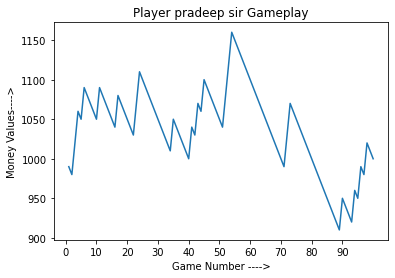

In [ ]:
#Time to call all the functions
StartIntroduction()
LuckyFactor() 

####**Conclusion:** 
Recreated a Teen Patti Game and analyzed the luck factor and performance of a particular player.

In [ ]:
! jupyter nbconvert --to html Luck_Analysis.ipynb

[NbConvertApp] Converting notebook Luck_Analysis.ipynb to html
[NbConvertApp] Writing 343523 bytes to Luck_Analysis.html
